# Demonstration of a simple Bernoulli bandits

In [11]:
import fortuna
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Initilising three Bernoulli bandits with different probabilities

In [12]:
probabilities = [0.4,0.6,0.7]
colors = ['blue','red','green']
bandits = [fortuna.bandits.Bernoulli(p) for p in probabilities]

### We can plot the probabilities of the three bandits

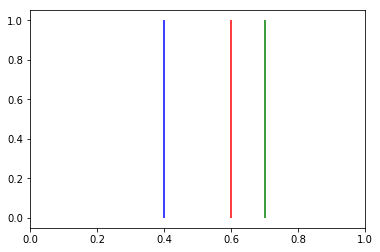

In [13]:
for bandit,col in zip(bandits,colors):
    bandit.plot_prior(color=col)
plt.show()

### We are initilizing all three bandits with uninformed priors, i.e. all likelihoods between 0 and 1 are equally likely.
#### A different prior can be assigned using bandit.assign_prior(a, b) for cases where you might know more about the probability

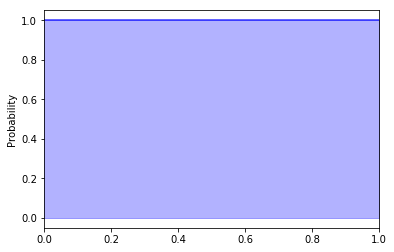

In [14]:
bandits[0].plot_posterior(color=colors[0])
plt.show()

### Now we are going to sample from the bandits, and select one to sample
#### Where they all have the same posteriors this is random sampling (exploring the bandits)

In [15]:
samples = [bandit.sample() for bandit in bandits]
print(f'The samples are: {samples}')
print(f'selecting one to sample based on the maximal reward')
chosen_bandit_index = np.argmax(samples)
chosen_bandit = bandits[chosen_bandit_index]
print(f'Chosen bandit number {chosen_bandit_index}.')

The samples are: [0.5884792176755931, 0.1115116373094994, 0.941844297297945]
selecting one to sample based on the maximal reward
Chosen bandit number 2.


### As a bandit has been chosen, we now 'pull' the bandit and update the bandit according to the result

In [16]:
reward = chosen_bandit.pull()
print(f'The result of the pull was {reward}')
chosen_bandit.update(reward)

The result of the pull was True


### We can see that the posterior function has been updated for this bandit

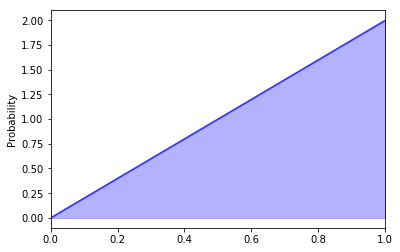

In [17]:
chosen_bandit.plot_posterior()

### The above can be done many times

In [18]:
n_steps = 50
chosen = []

for i in range(0,n_steps-1):# we have already done one step
    samples = [bandit.sample() for bandit in bandits]
    chosen_bandit = bandits[np.argmax(samples)]
    chosen.append(np.argmax(samples))
    reward = chosen_bandit.pull()
    chosen_bandit.update(reward)

### Look at the posterior functions after some steps, and compare to their underlying probabilities
#### As the posterior becomes closer to the underlying probability, when we perform argmax() we will increasingly select the bandit that returns the maximum reward (the green one)

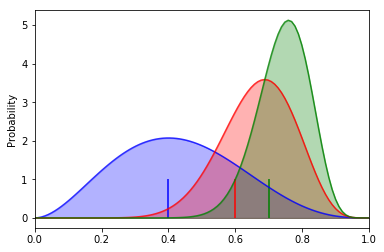

In [19]:
for bandit,col in zip(bandits,colors):
    bandit.plot_prior(color=col)
    bandit.plot_posterior(color=col)
plt.show()

Text(0, 0.5, 'bandit')

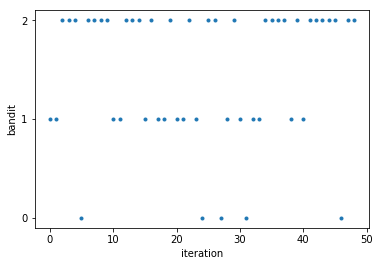

In [35]:
plt.plot(chosen,'.')
plt.yticks([0,1,2])
plt.xlabel('iteration')
plt.ylabel('bandit')